In [1]:
!wget "https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz"
!gzip -d "/content/amazon_reviews_us_Watches_v1_00.tsv.gz"

--2023-07-04 09:40:20--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.234.168, 52.216.21.45, 52.216.212.184, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.234.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162973819 (155M) [application/x-gzip]
Saving to: ‘amazon_reviews_us_Watches_v1_00.tsv.gz’

amazon_reviews_us_W 100%[===================>] 155.42M  42.7MB/s    in 4.0s    

2023-07-04 09:40:25 (38.4 MB/s) - ‘amazon_reviews_us_Watches_v1_00.tsv.gz’ saved [162973819/162973819]



In [2]:
import pandas as pd
file_path = '/content/amazon_reviews_us_Watches_v1_00.tsv'
df = pd.read_csv(file_path, sep='\t',error_bad_lines=False)
Data_used = 100000
df = df.sample(Data_used)
df.shape

<ipython-input-2-a6a4b7539643>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, sep='\t',error_bad_lines=False)
Skipping line 8704: expected 15 fields, saw 22
Skipping line 16933: expected 15 fields, saw 22
Skipping line 23726: expected 15 fields, saw 22

Skipping line 85637: expected 15 fields, saw 22

Skipping line 132136: expected 15 fields, saw 22
Skipping line 158070: expected 15 fields, saw 22
Skipping line 166007: expected 15 fields, saw 22
Skipping line 171877: expected 15 fields, saw 22
Skipping line 177756: expected 15 fields, saw 22
Skipping line 181773: expected 15 fields, saw 22
Skipping line 191085: expected 15 fields, saw 22
Skipping line 196273: expected 15 fields, saw 22
Skipping line 196331: expected 15 fields, saw 22

Skipping line 197000: expected 15 fields, saw 22
Skipping line 197011: expected 15 fields, saw 22
Skipping line 197432: expected 1

(100000, 15)

In [3]:
# Drop null values and count rows
df = df.dropna()
num_rows = df.count()
num_rows

marketplace          99982
customer_id          99982
review_id            99982
product_id           99982
product_parent       99982
product_title        99982
product_category     99982
star_rating          99982
helpful_votes        99982
total_votes          99982
vine                 99982
verified_purchase    99982
review_headline      99982
review_body          99982
review_date          99982
dtype: int64

In [4]:
from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords

In [5]:
review=pd.DataFrame(df.groupby('star_rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,star_rating,No of Users
0,5,59195
1,4,18107
2,1,8987
3,3,8273
4,2,5420


In [6]:
permanent = df[['star_rating' , 'review_body']]
mpermanent=permanent.dropna()
mpermanent.head()

,star_rating,review_body
784754,5,This watch is a great addition to my casual sp...
150735,5,-:¦:-•:*'&#34;*:•.-:¦:-•❧FABULOUS ❧ -:¦:- ❧ HI...
361203,3,Looks great! Have to wind it often to keep acc...
62869,3,Band keeps breaking after 3 returns I gave up....
209912,5,The watch is beautiful. Fits perfectly. Ther...


In [7]:
actualrating = mpermanent[(mpermanent['star_rating'] == 1) | (mpermanent['star_rating'] == 5)]
actualrating.shape

(68182, 2)

In [8]:
y = actualrating['star_rating']
x = actualrating['review_body'].reset_index()
print(len(y))
X = x['review_body']
print(X)

68182
0        This watch is a great addition to my casual sp...
1        -:¦:-•:*'&#34;*:•.-:¦:-•❧FABULOUS ❧ -:¦:- ❧ HI...
2        The watch is beautiful.  Fits perfectly.  Ther...
3        I really love the watch, if you like a big wat...
4        I wore it once and it doesn't work, so I just ...
                               ...                        
68177    I'm so happy with my purchase! The price was g...
68178    I wear it almost all the time, is comfortable,...
68179    Light weight, does not corrode, shows time, in...
68180                                 It's what I expected
68181    This is an awesome watch case that displays al...
Name: review_body, Length: 68182, dtype: object


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
tokenizer = RegexpTokenizer(r'\w+')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


def preprocess_text(text):
    tokenized =  ' '.join(tokenizer.tokenize(text))
    tokenized = tokenized.replace('_', ' ')
    # Tokenization
    tokens = word_tokenize(tokenized.lower())
    # Stop words removal
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    return stemmed_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=preprocess_text).fit(X)

In [ ]:
X = bow_transformer.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, nb_preds))
print('\n')
print(classification_report(y_test, nb_preds))
nb.score(X_train, y_train)

[[ 1789   823]
 [  441 17450]]


              precision    recall  f1-score   support

           1       0.80      0.68      0.74      2612
           5       0.95      0.98      0.97     17891

    accuracy                           0.94     20503
   macro avg       0.88      0.83      0.85     20503
weighted avg       0.94      0.94      0.94     20503



0.9510441271765714

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
clf_preds = clf.predict(X_test)

print(confusion_matrix(y_test, clf_preds))
print('\n')
print(classification_report(y_test, clf_preds))
nb.score(X_train, y_train)

[[ 2170   442]
 [  124 17767]]


              precision    recall  f1-score   support

           1       0.95      0.83      0.88      2612
           5       0.98      0.99      0.98     17891

    accuracy                           0.97     20503
   macro avg       0.96      0.91      0.93     20503
weighted avg       0.97      0.97      0.97     20503



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9510441271765714

In [ ]:
x = actualrating['review_body'].reset_index()
X = x['review_body']
review_cleans = [preprocess_text(x) for x in X];
sentences = [' '.join(r) for r in review_cleans ]

In [ ]:
from keras.preprocessing.text import Tokenizer
import numpy as np

#Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

<ipython-input-20-cef6c0c63148>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_sequences = np.array(tokenizer.texts_to_sequences(sentences))


In [ ]:
from keras.utils import pad_sequences

max_cap =20;
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [ ]:
Y = np.array([0 if label==1 else 1 for label in y])

np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

X = X[random_posits];
Y = Y[random_posits].reshape([-1,1]);

train_cap = int(0.6 * len(X));
dev_cap = int(0.8 * len(X));

X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Embedding


In [ ]:
model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(1, activation='sigmoid'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
model1.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=(X_dev, Y_dev))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 20)            499600    
                                                                 
 lstm (LSTM)                 (None, 20, 150)           102600    
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 100)               15100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 798,001
Trainable params: 798,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


641/641 [==============================] - 16s 13ms/step - loss: 0.3384 - accuracy: 0.8818 - val_loss: 0.2245 - val_accuracy: 0.9118
Epoch 2/50
641/641 [==============================] - 6s 9ms/step - loss: 0.1825 - accuracy: 0.9312 - val_loss: 0.1706 - val_accuracy: 0.9350
Epoch 3/50
641/641 [==============================] - 8s 12ms/step - loss: 0.1414 - accuracy: 0.9487 - val_loss: 0.1608 - val_accuracy: 0.9385
Epoch 4/50
641/641 [==============================] - 9s 13ms/step - loss: 0.1229 - accuracy: 0.9561 - val_loss: 0.1612 - val_accuracy: 0.9412
Epoch 5/50
641/641 [==============================] - 11s 18ms/step - loss: 0.1123 - accuracy: 0.9598 - val_loss: 0.1572 - val_accuracy: 0.9413
Epoch 6/50
641/641 [==============================] - 10s 15ms/step - loss: 0.1025 - accuracy: 0.9643 - val_loss: 0.1575 - val_accuracy: 0.9430
Epoch 7/50
641/641 [==============================] - 8s 13ms/step - loss: 0.0965 - accuracy: 0.9670 - val_loss: 0.1536 - val_accuracy: 0.9434
Epoch 8/

In [ ]:
model1_preds = model1.predict(X_test1)
model1_preds[model1_preds > 0.5] = 1
model1_preds[model1_preds <= 0.5] = 0
print(confusion_matrix(Y_test1, model1_preds))
print('\n')
print(classification_report(Y_test1, model1_preds))

428/428 [==============================] - 1s 3ms/step
[[ 1134   627]
 [  396 11512]]


              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1761
           1       0.95      0.97      0.96     11908

    accuracy                           0.93     13669
   macro avg       0.84      0.81      0.82     13669
weighted avg       0.92      0.93      0.92     13669



# Bert Model

In [ ]:
!pip install transformers
import nltk
nltk.download('movie_reviews')
nltk.download('stopwords')
import pandas as pd
import sklearn
import unicodedata
import numpy as np
import random
import re
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import transformers
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from transformers import BertTokenizer, TFBertForSequenceClassification

In [10]:
Y = np.array([0 if label==1 else 1 for label in y])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [11]:
num_classes = 2
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

def convert_fun_to_feature(review):
  return bert_tokenizer.encode_plus(review,
                add_special_tokens = True,
                max_length = 32,
                padding='max_length',
                truncation=True,
                return_attention_mask = True,
              )
def map_fun_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

def encode_fun(ds):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  for review, label in ds:
    bert_input = convert_fun_to_feature(review)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_fun_to_dict)

In [13]:
batch_size = 64

ds_train = zip(X_train, y_train)
ds_test = zip(X_test, y_test)
ds_train_encoded = encode_fun(ds_train).shuffle(len(X_train)).batch(batch_size)
ds_test_encoded = encode_fun(ds_test).batch(batch_size)

In [14]:
model_save_path = './bert_model.h5'

path = "./models/"

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

bert_model.summary()

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [17]:
learning_rate = 2e-5

number_of_epochs = 2

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(loss=loss,
                   optimizer=optimizer,
                   metrics=metric)

In [18]:
history = bert_model.fit(ds_train_encoded,
                         batch_size=batch_size,
                         epochs=number_of_epochs,
                         validation_data=ds_test_encoded)

Epoch 1/2
746/746 [==============================] - 392s 459ms/step - loss: 0.4441 - accuracy: 0.8653 - val_loss: 0.3947 - val_accuracy: 0.8659
Epoch 2/2
746/746 [==============================] - 338s 452ms/step - loss: 0.4268 - accuracy: 0.8649 - val_loss: 0.3973 - val_accuracy: 0.8659


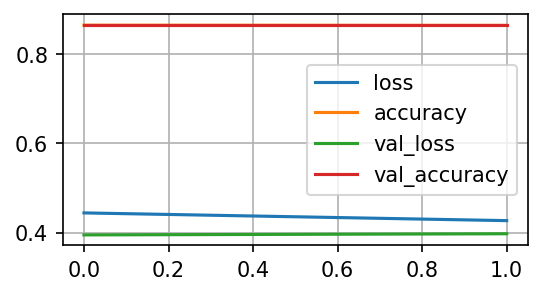

In [23]:
def plot1(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

def plot2(history):
    pd.DataFrame(history.history).plot(figsize=(4, 2))
    plt.grid(True)
    plt.show()
plot2(history)
